### H1B Visa dataset Analysis

In [4]:
# Importing the linraries for Analysis
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from IPython.display import HTML,SVG

import pygal
import seaborn as sns
import numpy as np 

In [5]:
# Loading the csv file into a variables
h1b = pd.read_csv("h1b_kaggle.csv")

In [6]:
# Checking the head of the data
h1b.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [7]:
# checking the tail of the data.
h1b.tail()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550
3002457,3002458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ALTANTA, GEORGIA",-84.387982,33.748995


In [8]:
# Deleting unwanted rows for analysis.
h1b = h1b.iloc[:,1:]
h1b = h1b.iloc[:, :8]

In [9]:
# With data with Nan 
h1b["CASE_STATUS"].value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [10]:
# Analyse all the case status except for the NAN
h1b = h1b.dropna()

# Taking only one column of certified status
h1b["CASE_STATUS"].value_counts()

CERTIFIED                                             2600241
CERTIFIED-WITHDRAWN                                    201479
DENIED                                                  93761
WITHDRAWN                                               89110
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [11]:
# Cleaning the data for Analysing Certified
year = h1b.drop(h1b.columns[[1,2,3,4,5,7]], axis=1)
year = year[year["CASE_STATUS"] == "CERTIFIED"]
Certified_per_year = year["YEAR"].value_counts()

In [12]:
# Cleaning the data for Analysing Denied
year = h1b.drop(h1b.columns[[1,2,3,4,5,7]], axis=1)
year = year[year["CASE_STATUS"] == "DENIED"]
Denied_per_year = year["YEAR"].value_counts()

In [14]:
# Cleaning the data for Analysing Certified-Withdrawn
year = h1b.drop(h1b.columns[[1,2,3,4,5,7]], axis=1)
year = year[year["CASE_STATUS"] == "CERTIFIED-WITHDRAWN"]
CW_per_year = year["YEAR"].value_counts()

In [15]:
# Cleaning the data for Analysing Withdrawn
year = h1b.drop(h1b.columns[[1,2,3,4,5,7]], axis=1)
year = year[year["CASE_STATUS"] == "WITHDRAWN"]
W_per_year = year["YEAR"].value_counts()

In [16]:
# Cleaning the data for Analysing Pending
year = h1b.drop(h1b.columns[[1,2,3,4,5,7]], axis=1)
year = year[year["CASE_STATUS"] == "PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED"]
P_per_year = year["YEAR"].value_counts()

In [17]:
# Cleaning the data for Analysing Rejected
year = h1b.drop(h1b.columns[[1,2,3,4,5,7]], axis=1)
year = year[year["CASE_STATUS"] == "REJECTED"]
R_per_year = year["YEAR"].value_counts()

In [18]:
# Cleaning the data for Analysing Invalidated
year = h1b.drop(h1b.columns[[1,2,3,4,5,7]], axis=1)
year = year[year["CASE_STATUS"] == "INVALIDATED"]
I_per_year = year["YEAR"].value_counts()

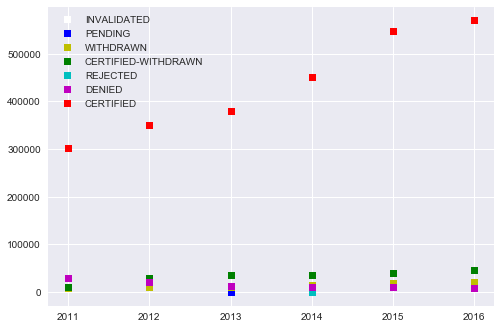

In [19]:
# ploting a scatter plot of all the status for the years (2011-2016)
labels1 = 'INVALIDATED', 'PENDING', 'WITHDRAWN','CERTIFIED-WITHDRAWN', 'REJECTED','DENIED','CERTIFIED'

plt.plot(I_per_year,'ws', P_per_year,'bs', W_per_year,'ys', CW_per_year,'gs',R_per_year,'cs',Denied_per_year,'ms',Certified_per_year,'rs')
plt.legend(('INVALIDATED', 'PENDING', 'WITHDRAWN','CERTIFIED-WITHDRAWN', 'REJECTED','DENIED','CERTIFIED'))
plt.show()

In [20]:
# Getting the state data from work site.
h1b1 = []
h1 = []
for i in h1b["WORKSITE"]:
    h1 = i.split(',')
    h1b1.append(h1[1])


In [21]:
# sorting it for printing it right in the lgends.
h = sorted(set(h1b1))

In [22]:
# Creating a data frame of the list generated.
df = pd.DataFrame({'col':h1b1})
df['col'].value_counts()

 CALIFORNIA              556014
 TEXAS                   293213
 NEW YORK                290005
 NEW JERSEY              212420
 ILLINOIS                159831
 MASSACHUSETTS           115884
 PENNSYLVANIA            109411
 FLORIDA                 105227
 GEORGIA                 102806
 WASHINGTON              102407
 VIRGINIA                 89471
 MICHIGAN                 82298
 NORTH CAROLINA           79299
 OHIO                     75823
 MARYLAND                 55904
 CONNECTICUT              49742
 MINNESOTA                48317
 ARIZONA                  41656
 MISSOURI                 34686
 WISCONSIN                32438
 COLORADO                 31791
 INDIANA                  30425
 TENNESSEE                27540
 OREGON                   23663
 DISTRICT OF COLUMBIA     22600
 DELAWARE                 18029
 IOWA                     16573
 ARKANSAS                 14661
 KANSAS                   13644
 UTAH                     13077
 SOUTH CAROLINA           12872
 KENTUCK

In [23]:
# Merging both the ne and original data frame.
data_frame = [h1b,df]
data_frame = pd.concat(data_frame, axis=1)

In [24]:
# Cleaning data frame for analysing
data_frame = data_frame.dropna()
states = data_frame.drop(data_frame.columns[[1,2,3,4,5,6,7]], axis=1)

In [25]:
# Extracting data for all the status we are looking for.
certified_states = states[states["CASE_STATUS"] == "CERTIFIED"]
denied_states = states[states["CASE_STATUS"] == "DENIED"]
cw_states = states[states["CASE_STATUS"] == "CERTIFIED-WITHDRAWN"]
w_states = states[states["CASE_STATUS"] == "WITHDRAWN"]

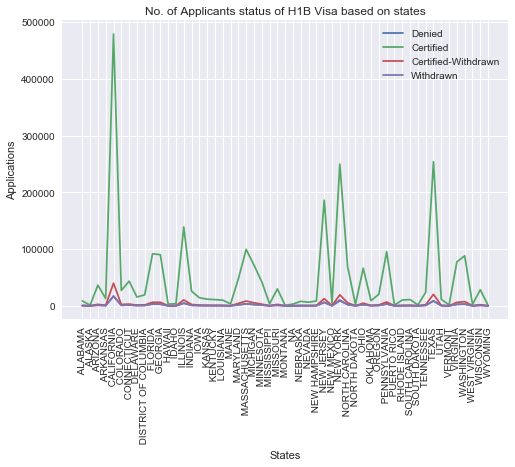

In [26]:
# Ploting the graph for count of status based on states
objects = h

y_pos = np.arange(len(objects))

performance0 = denied_states['col'].value_counts().sort_index()
performance1 = certified_states['col'].value_counts().sort_index()
performance2 = cw_states['col'].value_counts().sort_index()
performance3 = w_states['col'].value_counts().sort_index()


plt.plot(y_pos, performance0, label = 'Denied')
plt.plot(y_pos, performance1, label = 'Certified')
plt.plot(y_pos, performance2, label = 'Certified-Withdrawn')
plt.plot(y_pos, performance3, label = 'Withdrawn')

plt.xticks(y_pos, objects,rotation=90)
plt.xlabel('States')
plt.ylabel('Applications')
plt.title('No. of Applicants status of H1B Visa based on states')
plt.legend()
plt.show()
